#Por día

In [38]:
import pandas as pd

df = pd.read_csv('CSVs/analisis_formato_mayo_ok_ok-1717165325042.csv', encoding='utf-8',)

df

,folio_recepcion,descripcion,fecha_recepcion
0,2024222191,NO PROCESADO MEDIPASS,2024-05-20
1,2024201221,NO PROCESADO MEDIPASS,2024-05-15
2,2024201207,NO PROCESADO MEDIPASS,2024-05-15
3,2024201018,NO PROCESADO MEDIPASS,2024-05-15
4,2024202172,NO PROCESADO MEDIPASS,2024-05-27
...,...,...,...
6909,2024202050,NO PROCESADO MEDIPASS,2024-05-27
6910,2024207266,NO PROCESADO MEDIPASS,2024-05-10
6911,2024499570,NO PROCESADO MEDIPASS,2024-05-14
6912,2024207313,NO PROCESADO MEDIPASS,2024-05-10


In [39]:
df['fecha_recepcion'].unique()

array(['2024-05-20', '2024-05-15', '2024-05-27', '2024-05-14',
       '2024-05-16', '2024-05-06', '2024-05-17', '2024-05-02',
       '2024-05-23', '2024-05-22', '2024-05-29', '2024-05-13',
       '2024-05-07', '2024-05-24', '2024-05-09', '2024-05-03',
       '2024-05-10', '2024-05-08', '2024-05-28'], dtype=object)

In [40]:
# Convertir la columna fecha_visacion a tipo datetime
df['fecha_recepcion'] = pd.to_datetime(df['fecha_recepcion'])

df

,folio_recepcion,descripcion,fecha_recepcion
0,2024222191,NO PROCESADO MEDIPASS,2024-05-20
1,2024201221,NO PROCESADO MEDIPASS,2024-05-15
2,2024201207,NO PROCESADO MEDIPASS,2024-05-15
3,2024201018,NO PROCESADO MEDIPASS,2024-05-15
4,2024202172,NO PROCESADO MEDIPASS,2024-05-27
...,...,...,...
6909,2024202050,NO PROCESADO MEDIPASS,2024-05-27
6910,2024207266,NO PROCESADO MEDIPASS,2024-05-10
6911,2024499570,NO PROCESADO MEDIPASS,2024-05-14
6912,2024207313,NO PROCESADO MEDIPASS,2024-05-10


In [41]:
#df['fecha_recepcion'] = df['fecha_recepcion'].dt.to_period('')

# Reemplazar NaN en la columna 'descripcion' con la cadena "procesados"
#df['descripcion'].fillna("PROCESADOS NO DEVUELTOS", inplace=True)

#not_includes_dates = ['2024-04-06', '2024-04-07', '2024-04-11']

not_includes_dates_con_tiempo = [f'{fecha} 00:00:00' for fecha in not_includes_dates]


filtro_fecha = (df['fecha_recepcion'] >= '2023-08') & (~df['fecha_recepcion'].isin(not_includes_dates))

# Aplicar el filtro para seleccionar solo las filas a partir de agosto de 2023
df = df[filtro_fecha]

# Contar la cantidad de errores por fecha
error_count_by_date = df.groupby(['fecha_recepcion', 'descripcion']).count().unstack(fill_value=0).reset_index()



error_count_by_date

fecha_recepcion       folio_recepcion                     \
descripcion                 COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                2024-05-02                    73                 43   
1                2024-05-03                    79                 46   
2                2024-05-06                    87                 57   
3                2024-05-07                    66                 41   
4                2024-05-08                    95                 69   
5                2024-05-09                    61                 28   
6                2024-05-10                    57                 33   
7                2024-05-13                    74                 24   
8                2024-05-14                    83                 24   
9                2024-05-15                    91                 24   
10               2024-05-16                    71                 27   
11               2024-05-17                    94                 16   
12               2024-05-20                    77                 16   
13               2024-05-22                   100                 22   
14               2024-05-23                    73                 23   
15               2024-05-24                    81                 12   
16               2024-05-27                    89                 16   
17               2024-05-28                    62                 14   
18               2024-05-29                     2                  0   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                            1               
1                                                            0               
2                                                            0               
3                                                            1               
4                                                            2               
5                                                            1               
6                                                            0               
7                                                            1               
8                                                            1               
9                                                            1               
10                                                           4               
11                                                           2               
12                                                           3               
13                                                           1               
14                                                           0               
15                                                           1               
16                                                           1               
17                                                           0               
18                                                           0               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                        6                 107   
1                                        8                   2   
2                                       13                   8   
3                                        7                 154   
4                                       12                   4   
5                                       10                 170   
6                                       13                  15   
7                                       11                 183   
8                                       13                  60   
9                                       14                   2   
10                                      11                 122   
11

In [42]:

# Agregar una columna que indique la suma de los errores por fecha
error_count_by_date['TOTAL_PUBLICADOS'] = error_count_by_date.iloc[:, 1:].sum(axis=1)

error_percentages = error_count_by_date.copy()
for col in error_percentages.columns[1:-1]:
    error_percentages[col] = (error_percentages[col] / error_percentages['TOTAL_PUBLICADOS']) * 100


error_percentages

fecha_recepcion       folio_recepcion                     \
descripcion                 COTIZ < LIQ DE SUELDO FALTA COTIZ. SALUD   
0                2024-05-02             20.277778          11.944444   
1                2024-05-03             27.430556          15.972222   
2                2024-05-06             25.513196          16.715543   
3                2024-05-07             15.102975           9.382151   
4                2024-05-08             25.815217          18.750000   
5                2024-05-09             13.174946           6.047516   
6                2024-05-10             20.652174          11.956522   
7                2024-05-13             16.017316           5.194805   
8                2024-05-14             21.119593           6.106870   
9                2024-05-15             28.526646           7.523511   
10               2024-05-16             17.444717           6.633907   
11               2024-05-17             24.543081           4.177546   
12               2024-05-20             24.444444           5.079365   
13               2024-05-22             25.641026           5.641026   
14               2024-05-23             11.717496           3.691814   
15               2024-05-24             23.823529           3.529412   
16               2024-05-27             23.924731           4.301075   
17               2024-05-28             36.470588           8.235294   
18               2024-05-29              0.966184           0.000000   

                                                                            \
descripcion FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL   
0                                                     0.277778               
1                                                     0.000000               
2                                                     0.000000               
3                                                     0.228833               
4                                                     0.543478               
5                                                     0.215983               
6                                                     0.000000               
7                                                     0.216450               
8                                                     0.254453               
9                                                     0.313480               
10                                                    0.982801               
11                                                    0.522193               
12                                                    0.952381               
13                                                    0.256410               
14                                                    0.000000               
15                                                    0.294118               
16                                                    0.268817               
17                                                    0.000000               
18                                                    0.000000               

                                                                \
descripcion NO HAY IMAGENES PARA DESCARGAR NO IMAGENES CON API   
0                                 1.666667           29.722222   
1                                 2.777778            0.694444   
2                                 3.812317            2.346041   
3                                 1.601831           35.240275   
4                                 3.260870            1.086957   
5                                 2.159827           36.717063   
6                                 4.710145            5.434783   
7                                 2.380952           39.610390   
8                                 3.307888           15.267176   
9                                 4.388715            0.626959   
10                                2.702703           29.975430   
11

Reemplaza las columnas de eror_percentages

In [43]:

# Mostrar el resultadod
#error_percentages.set_index('date', inplace=True)

#Con todas las descripciones
'''error_percentages.columns = 
    'date',
    'COTIZ < LIQ DE SUELDO',
    'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'SOBRE 60 ANIOS SIN PENSION',#nuevo
   'TOTAL_errores']'''

#Descripciones seleccionadas
error_percentages.columns = ['date',
    'COTIZ < LIQ DE SUELDO',
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    'TOTAL_errores']




error_percentages

,date,COTIZ < LIQ DE SUELDO,FALTA COTIZ. SALUD,FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL,NO HAY IMAGENES PARA DESCARGAR,NO IMAGENES CON API,NO PROCESADO MEDIPASS,NO SE ENCUENTRA CODIGO AFP,NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS,RENTA = TOPE,TOTAL_errores
0,2024-05-02,20.277778,11.944444,0.277778,1.666667,29.722222,35.000000,0.000000,0.277778,0.833333,360
1,2024-05-03,27.430556,15.972222,0.000000,2.777778,0.694444,50.694444,0.000000,0.000000,2.430556,288
2,2024-05-06,25.513196,16.715543,0.000000,3.812317,2.346041,47.214076,0.293255,0.000000,4.105572,341
3,2024-05-07,15.102975,9.382151,0.228833,1.601831,35.240275,35.697941,0.228833,0.000000,2.517162,437
4,2024-05-08,25.815217,18.750000,0.543478,3.260870,1.086957,46.195652,0.000000,0.271739,4.076087,368
5,2024-05-09,13.174946,6.047516,0.215983,2.159827,36.717063,40.604752,0.000000,0.000000,1.079914,463
6,2024-05-10,20.652174,11.956522,0.000000,4.710145,5.434783,54.347826,0.362319,0.000000,2.536232,276
7,2024-05-13,16.017316,5.194805,0.216450,2.380952,39.610390,33.116883,0.000000,0.000000,3.463203,462
8,2024-05-14,21.119593,6.106870,0.254453,3.307888,15.267176,50.127226,0.000000,0.000000,3.816794,393
9,2024-05-15,28.526646,7.523511,0.313480,4.388715,0.626959,53.918495,0.000000,0.313480,4.388715,319


In [44]:
error_percentages['date'] = pd.to_datetime(error_percentages['date'])

error_percentages.dtypes

date                                                              datetime64[ns]
COTIZ < LIQ DE SUELDO                                                    float64
FALTA COTIZ. SALUD                                                       float64
FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL           float64
NO HAY IMAGENES PARA DESCARGAR                                           float64
NO IMAGENES CON API                                                      float64
NO PROCESADO MEDIPASS                                                    float64
NO SE ENCUENTRA CODIGO AFP                                               float64
NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS                               float64
RENTA = TOPE                                                             float64
TOTAL_errores                                                              int64
dtype: object

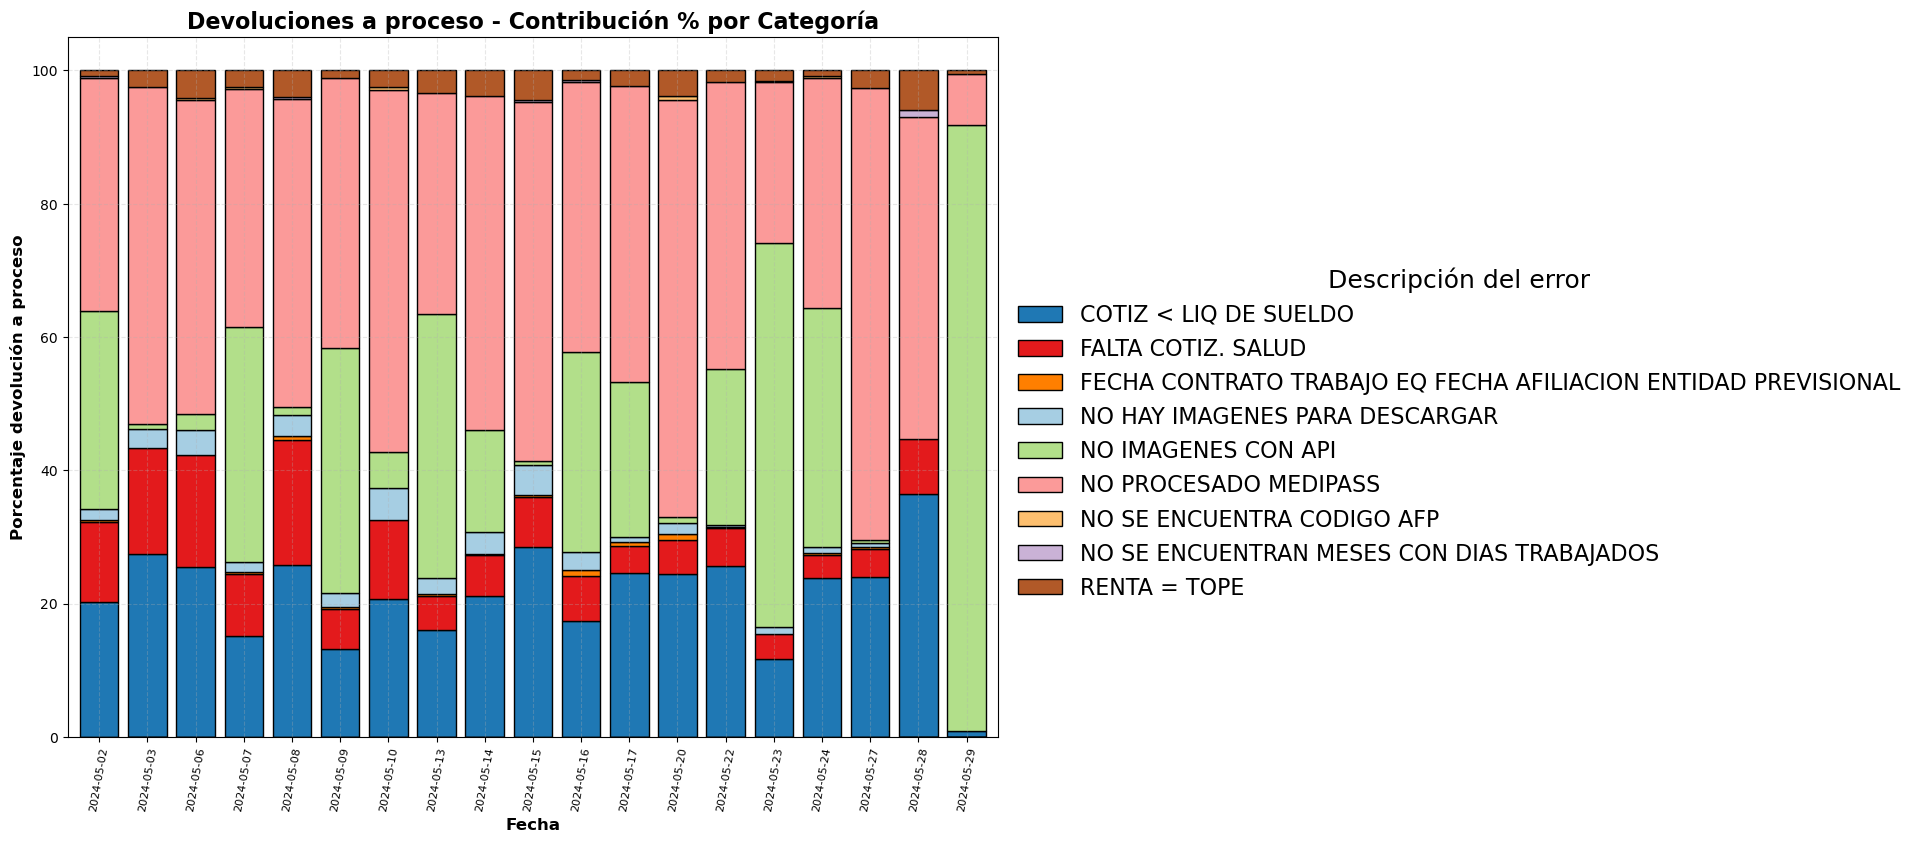

In [45]:
import matplotlib.pyplot as plt

from matplotlib.patches import PathPatch
from matplotlib.path import Path


error_percentages['date'] = error_percentages['date'].dt.strftime('%Y-%m-%d')

columnas_grafica = [
    'date',
    'COTIZ < LIQ DE SUELDO',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES',#nuevo
    'FALTA COTIZ. SALUD',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL', 
    #'NO DERECHO A PAGO SUBSIDIO',
    'NO HAY IMAGENES PARA DESCARGAR',
    'NO IMAGENES CON API',
    'NO PROCESADO MEDIPASS',
    'NO SE ENCUENTRA CODIGO AFP',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS',
    'RENTA = TOPE',
    #'SOBRE 60 ANIOS SIN PENSION'#nuevo
    ]



colores_distintivos = {
    'COTIZ < LIQ DE SUELDO': '#1f78b4',
    #'ERROR AL DESCARGAR ALGUNAS IMAGENES': '#33a02c',
    'FALTA COTIZ. SALUD': '#e31a1c',
    'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': '#ff7f00',
    #'NO DERECHO A PAGO SUBSIDIO': '#6a3d9a',
    'NO HAY IMAGENES PARA DESCARGAR': '#a6cee3',
    'NO IMAGENES CON API': '#b2df8a',
    'NO PROCESADO MEDIPASS': '#fb9a99',
    'NO SE ENCUENTRA CODIGO AFP': '#fdbf6f',
    'NO SE ENCUENTRAN MESES CON DIAS TRABAJADOS': '#cab2d6',
    'RENTA = TOPE': '#b15928',
    #'SOBRE 60 ANIOS SIN PENSION': '#fdbf6f'
}
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold')
plt.legend(title='Descripción del error', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=16, title_fontsize=18, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
#ax.set_facecolor('lightgray')
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=80)

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.005)

plt.tick_params(axis='x', labelsize=8)

plt.show()

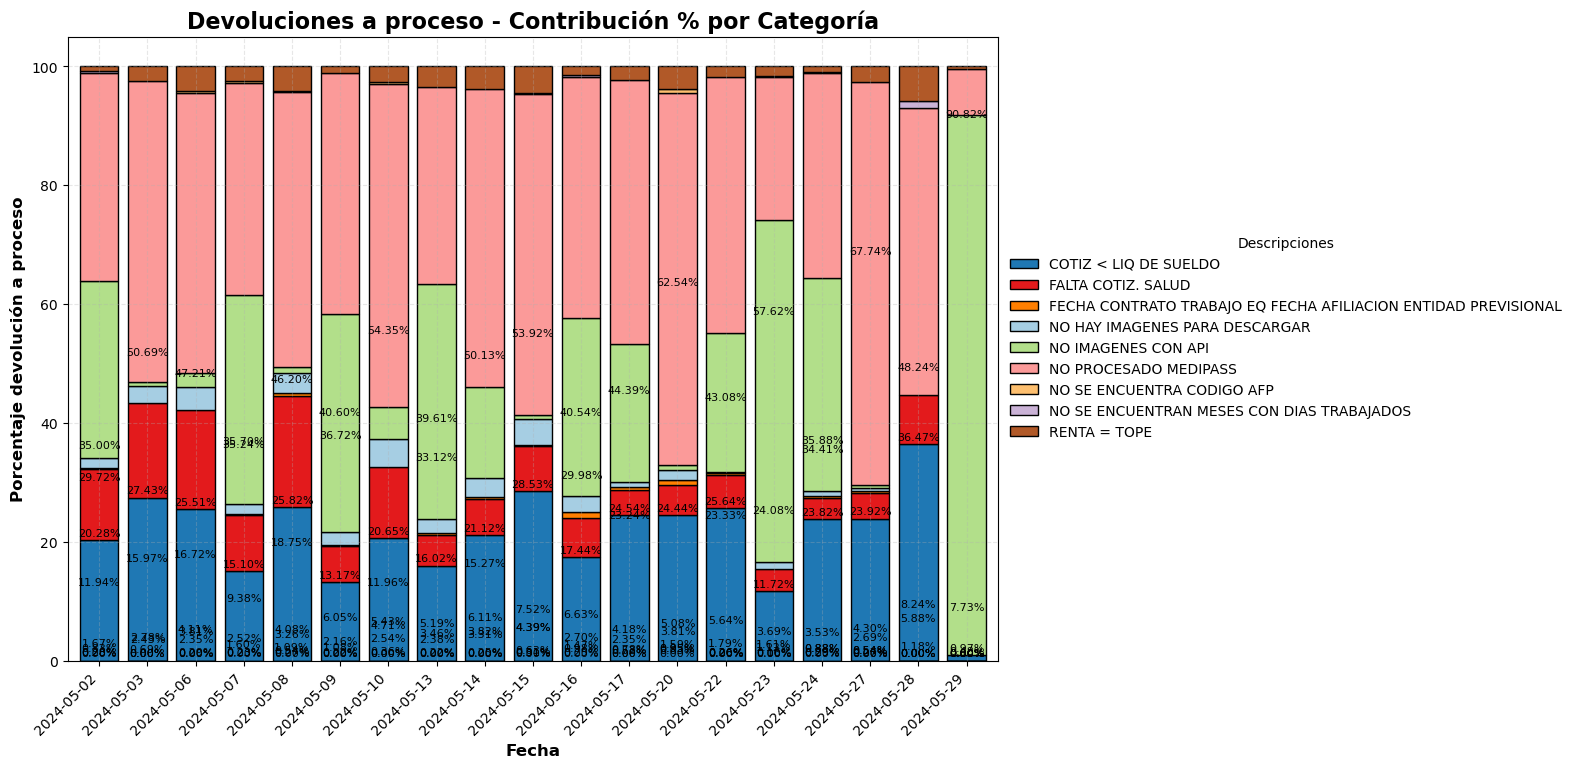

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = error_percentages[columnas_grafica].plot(kind='bar', stacked=True, x='date', color=[colores_distintivos[col] for col in columnas_grafica[1:]], width=0.8, edgecolor='black', ax=ax)
plt.xlabel('Fecha', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje devolución a proceso', fontsize=12, fontweight='bold')
plt.title('Devoluciones a proceso - Contribución % por Categoría', fontsize=16, fontweight='bold', loc='center')  # Alinea el título al centro
plt.legend(title='Descripciones', bbox_to_anchor=(1, 0.7), loc='upper left', ncol=1, fontsize=10, frameon=False )

plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(len(error_percentages['date'])), error_percentages['date'], rotation=45, ha='right')  # Ajusta la rotación y alineación de las etiquetas del eje x
plt.yticks(fontsize=10)  # Aumenta el tamaño de la fuente en el eje y

# Ajustar el espacio ocupado por la sección de barras
plt.subplots_adjust(bottom=0.1)

# Añadir etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

Este no duncion... Todavia


<Figure size 1200x800 with 0 Axes>

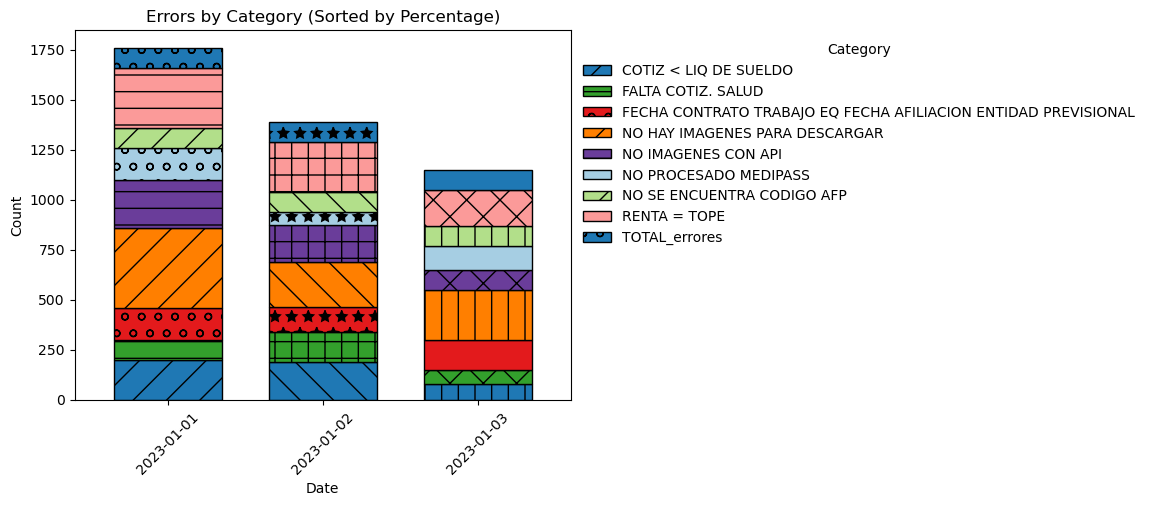

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Tu DataFrame
data = {'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'COTIZ < LIQ DE SUELDO': [10, 15, 8],
        'FALTA COTIZ. SALUD': [5, 12, 7],
        'FECHA CONTRATO TRABAJO EQ FECHA AFILIACION ENTIDAD PREVISIONAL': [8, 10, 15],
        'NO HAY IMAGENES PARA DESCARGAR': [20, 18, 25],
        'NO IMAGENES CON API': [12, 15, 10],
        'NO PROCESADO MEDIPASS': [8, 5, 12],
        'NO SE ENCUENTRA CODIGO AFP': [5, 8, 10],
        'RENTA = TOPE': [15, 20, 18],
        'TOTAL_errores': [5, 8, 10]}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calcular porcentajes solo para columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns
porcentajes_errores = df[columnas_numericas].div(df['TOTAL_errores'], axis=0) * 100

# Paleta de colores distintiva
colores_distintivos = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3', '#b2df8a', '#fb9a99']

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar barras agrupadas con la paleta de colores distintivos y patrones
ax = porcentajes_errores.plot(kind='bar', stacked=True, color=colores_distintivos, edgecolor='black', width=0.7)

# Asignar patrones diferentes a cada categoría
patrones_colores = ['/', '\\', '|', '-', '+', 'x', 'o', '*']
for i, (colname, hatch) in enumerate(zip(porcentajes_errores.columns, patrones_colores)):
    for bar in ax.patches[i::len(porcentajes_errores.columns)]:
        bar.set_hatch(hatch)

# Cambiar el tamaño de las etiquetas del eje x
plt.xticks(range(len(df['date'])), df['date'].dt.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Errors by Category (Sorted by Percentage)')
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=10, frameon=False)

plt.show()

